# Bài tập two-sample t-test

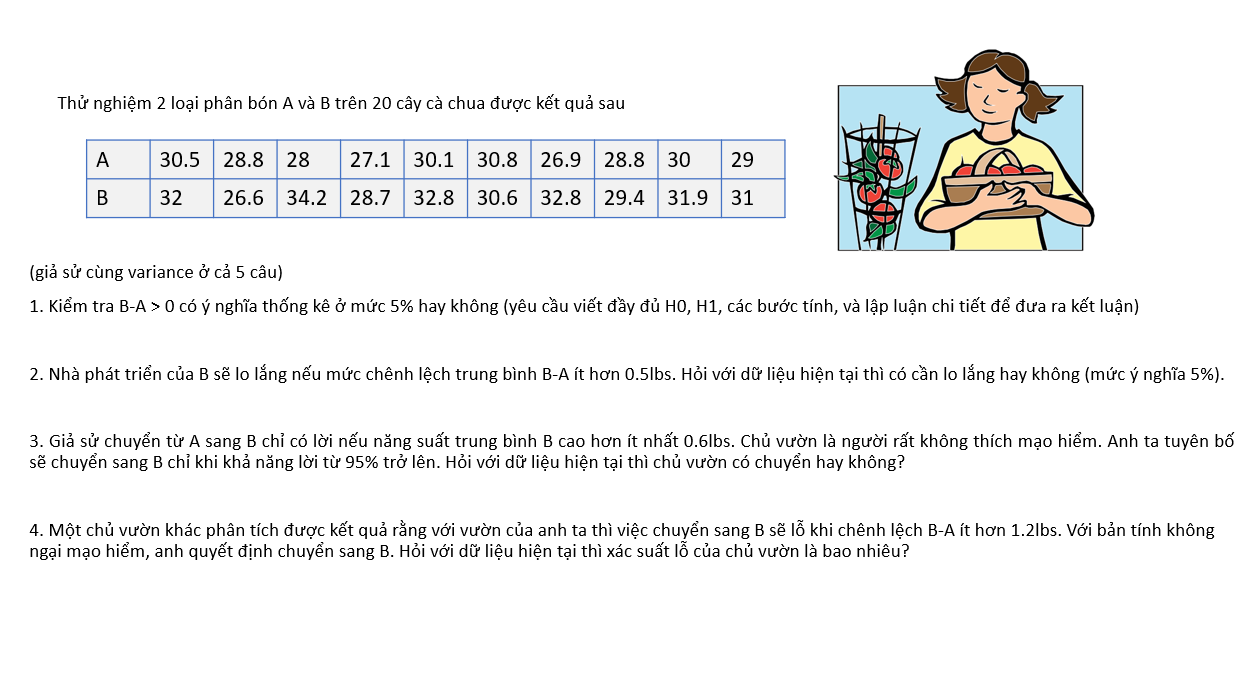

## Nhập dữ liệu và trực quan hóa

### Nhập dữ liệu

In [1]:
A = c(30.5,28.8,28,27.1,30.1,30.8,26.9,28.8,30,29)
B = c(32,26.6,34.2,28.7,32.8,30.6,32.8,29.4,31.9,31)
na = 10 ; nb<-10 ; sa<-sd(A) ; sb<-sd(B)
sp = sqrt(((nb-1)*sb^2+(na-1)*sa^2)/(nb+na-2))
ybarA = mean(A)
ybarB = mean(B)
sprintf("Chenh lech hien tai giua B va A: %f",ybarB-ybarA)

[1] "Chenh lech hien tai giua B va A: 2.000000"

### Trực quan hóa

Tạo dataframe từ 2 mảng A,B

In [4]:
adf = data.frame(A)
adf
adf$type = "A"
adf
bdf = data.frame(B)
bdf$type = "B"
bdf

A
30.5
28.8
28.0
27.1
30.1
30.8
26.9
28.8
30.0
29.0


A,type
30.5,A
28.8,A
28.0,A
27.1,A
30.1,A
30.8,A
26.9,A
28.8,A
30.0,A
29.0,A


B,type
32.0,B
26.6,B
34.2,B
28.7,B
32.8,B
30.6,B
32.8,B
29.4,B
31.9,B
31.0,B


Đổi tên cột đầu tiên của 2 dataframe

In [5]:
colnames(adf)[1] <- "value"
adf
colnames(bdf)[1] <- "value"
bdf

value,type
30.5,A
28.8,A
28.0,A
27.1,A
30.1,A
30.8,A
26.9,A
28.8,A
30.0,A
29.0,A


value,type
32.0,B
26.6,B
34.2,B
28.7,B
32.8,B
30.6,B
32.8,B
29.4,B
31.9,B
31.0,B


Nối 2 dataframe

In [6]:
data = rbind(adf,bdf)
data

value,type
30.5,A
28.8,A
28.0,A
27.1,A
30.1,A
30.8,A
26.9,A
28.8,A
30.0,A
29.0,A


Plot dataframe

In [5]:
set_plot_dimensions <- function(width_choice, height_choice) {options(repr.plot.width=width_choice, repr.plot.height=height_choice)}

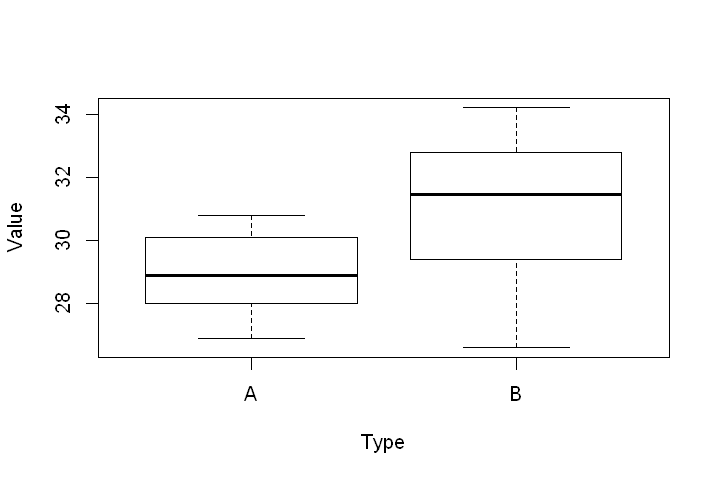

In [6]:
set_plot_dimensions(6, 4)
plot(as.factor(data$type),data$value,xlab='Type', ylab='Value')

### Cách đọc box-and-whisker plot

Thông tin từ box plot:
- Điểm trung vị (median)
- Độ lệch (Skewness) 
- Độ phân tán (Dispersion,Variability,Scatter, or Spread)
- Điểm dị biệt (Outlier)

<div>
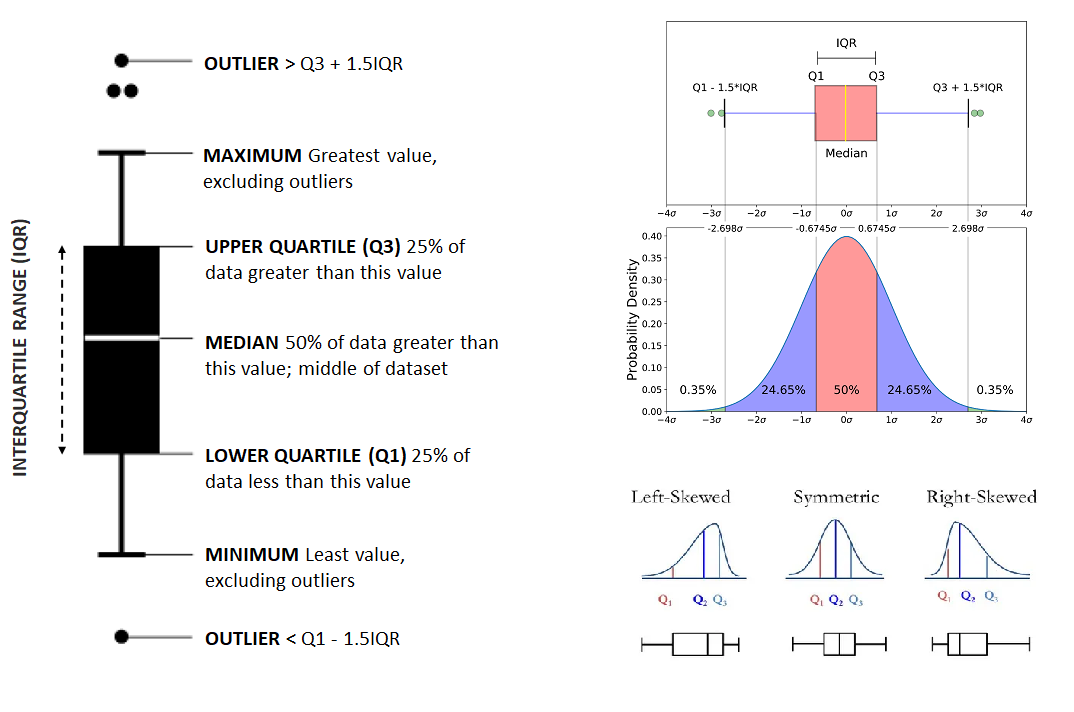
</div>

Reading box plot:
- Step 1: Compare the medians of box plots
- Step 2: Compare the interquartile ranges and whiskers of box plots
- Step 3: Look for potential outliers
- Step 4: Look for signs of skewness

## Câu 1

Kiểm tra B-A > 0 có ý nghĩa thống kê ở mức 5% hay không

### Kiểm định giả thuyết


<div>
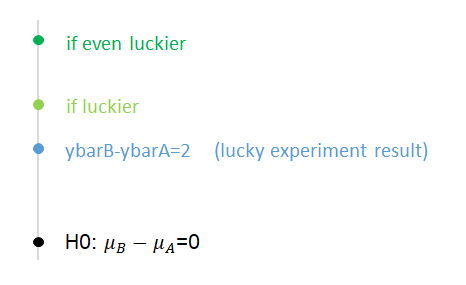
</div>

- Đặt μA, μB là mean của toàn bộ quần thể A, B
- H0: μB - μA = 0 (không có sự khác biệt giữa 2 loại phân B và A)
- H1: μB - μA > 0 (năng suất cây bón phân B cao hơn A)

In [7]:
t=(ybarB - ybarA)/(sp*sqrt(1/nb+1/na))
print(t)

[1] 2.396169


In [8]:
pt(t,18,lower.tail = FALSE) 

[1] 0.01382166

- Nếu H0 đúng thì xs P(ybarB-ybarA≥2) = P(t≥2.4) = 0.014 < 0.05 -> bác bỏ H0 (μB - μA = 0) 


  <div> 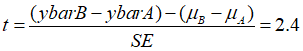 </div>

- Nếu μB - μA < 0 thì t>2.4 -> P(ybarB-ybarA≥2)>0.014 -> bác bỏ μB - μA < 0
- Kết luận chấp nhận H1: μB - μA > 0 (năng suất cây bón phân B cao hơn A)

### Trực quan hóa câu 1

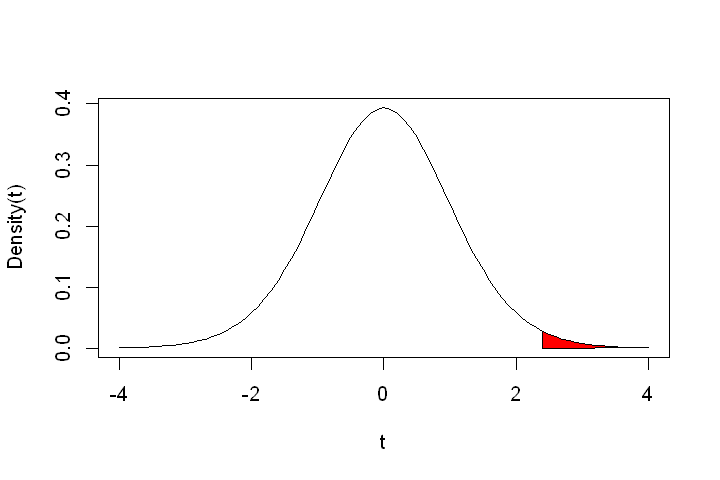

In [9]:
Tvalues = seq(-4,4,.1)
x = Tvalues 
y = dt(Tvalues,18)
plot(x , y , type = "l" , xlab = "t" , ylab = "Density(t)")
polygon(c(x[x>=t],min(x[x>=t])),c(y[x>=t],0),col="red")

### t-test sử dụng hàm của R

In [14]:
t.test(data$value ~ data$type,var.equal = TRUE,mu=0, alternative = "less",paired = FALSE,conf.level = 0.95)


	Two Sample t-test

data:  data$value by data$type
t = -2.3962, df = 18, p-value = 0.01382
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
       -Inf -0.5526368
sample estimates:
mean in group A mean in group B 
             29              31 


In [15]:
t.test(data$value ~ data$type,var.equal = FALSE,mu=0, alternative = "less",paired = FALSE,conf.level = 0.95)


	Welch Two Sample t-test

data:  data$value by data$type
t = -2.3962, df = 14.81, p-value = 0.01512
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
       -Inf -0.5355549
sample estimates:
mean in group A mean in group B 
             29              31 


## Câu 2
Tính khoảng tin cậy 95% 2  bên của chênh lệch B-A

### Tính khoảng tin cậy

In [54]:
t025=abs(qt(0.025,18))
lbound<-mean(B)-mean(A)-t025*sp*sqrt(1/nb+1/na)
ubound<-mean(B)-mean(A)+t025*sp*sqrt(1/nb+1/na)
cat(sprintf("95%% CI: [%f ; %f]",lbound,ubound))

95% CI: [0.246433 ; 3.753567]

### Trực quan hóa

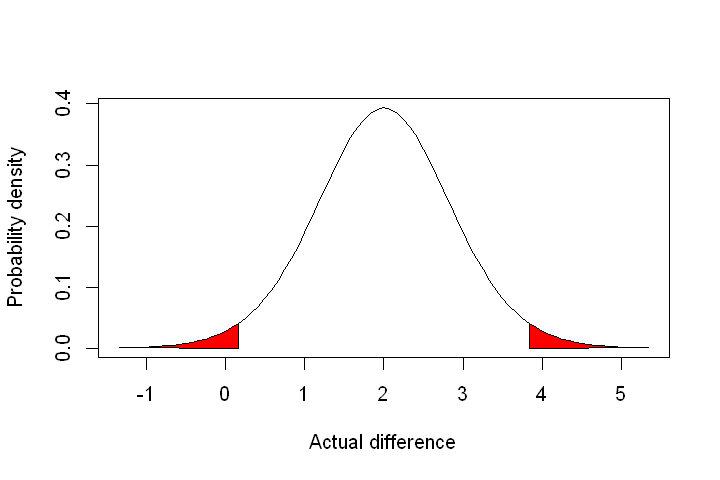

In [55]:
Tvalues = seq(-4,4,.1)
m = mean(B)-mean(A)+Tvalues*sp*sqrt(1/nb+1/na)
plot(m , y , type = 'l' , xlab = 'Actual difference' , ylab = 'Probability density')
polygon(c(m[m>=ubound],min(m[m>=ubound])), c(y[m>=ubound],0), col="red")
polygon(c(m[m<=lbound],max(m[m<=lbound])), c(y[m<=lbound],0), col="red")


## Câu 3
Nhà phát triển của B sẽ lo lắng nếu mức chênh lệch trung bình B-A ít hơn 0.5lbs. Hỏi với dữ liệu hiện tại thì có cần lo lắng hay không (mức ý nghĩa 5%).

### Kiểm định giả thuyết
- H0: μB-μA=0.5 
- H1: μB>0.5 (không cần lo lắng)

In [43]:
t=((ybarB-ybarA)-0.5)/(sp*sqrt(1/nb+1/na))
print(t)

[1] 1.797127


In [47]:
pt(t,df=18,lower.tail = FALSE)

[1] 0.04455732

Chênh lệch hiện tại ybarb-ybarA=2. 
- Giả sử H0 đúng -> P(ybarB-ybarA>=2) = P(t>1.8) = 0.044 < 0.05 -> bác bỏ H0: μB-μA=0.5 
- Nếu μB-μA<0.5 thì t>1.8 -> P(ybarB-ybarA>=2) < 0.044 -> bác bỏ μB-μA<0.5
- Kết luận chấp nhận H1: μB>0.5 (không cần lo lắng)

## Câu 3 (trường hợp left-tailed test)
Nhà sản xuất tuyên bố B có thể giúp sản lượng tăng lên ít nhất là 3.5lbs (chênh lệch B-A≥3.5). Có thể bác bỏ tuyên bố này hay không?

### Kiểm định giả thuyết

<div> 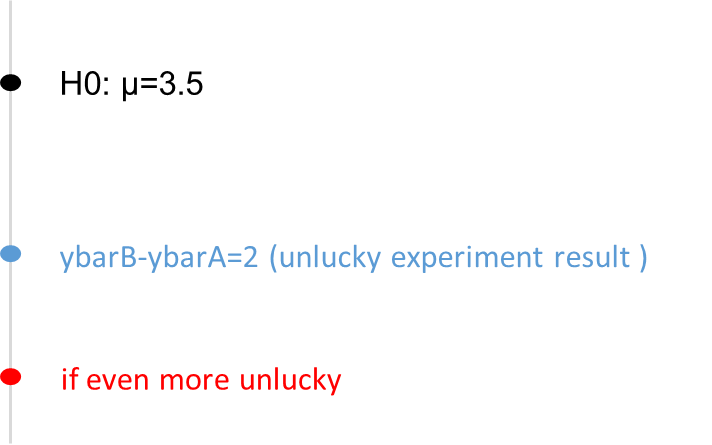 </div>

- H0: μB-μA=3.5 
- H1: μB-μA<3.5

In [48]:
t=((ybarB-ybarA)-3.5)/(sp*sqrt(1/nb+1/na))
print(t)

[1] -1.797127


In [49]:
pt(t,df=18,lower.tail=TRUE)

[1] 0.04455732

- Giả sử H0 đúng thì P(ybarB-ybarA <= 2) = P(t <= -1.8) = 0.045 < 0.05 -> bác bỏ H0: μB-μA=3.5
- Nếu μB-μA>3.5 thì t < -1.8 -> P(ybarB-ybarA <= 2) < 0.045 -> bác bỏ μB-μA>3.5 -> chấp nhận H1: μB-μA<3.5 (bác bỏ tuyên bố của nhà sản xuất)

### t-test sử dụng hàm R

In [18]:
t.test(data$value ~ data$type,var.equal = TRUE,mu=-3.5, alternative = "greater",paired = FALSE,conf.level = 0.95)


	Two Sample t-test

data:  data$value by data$type
t = 1.7971, df = 18, p-value = 0.04456
alternative hypothesis: true difference in means is greater than -3.5
95 percent confidence interval:
 -3.447363       Inf
sample estimates:
mean in group A mean in group B 
             29              31 


## Câu 3 (trường hợp two-tailed test)
Nhà sản xuất tuyên bố B có thể giúp sản lượng tăng lên khoảng 3.5lbs (chênh lệch B-A=3.5). Có thể bác bỏ tuyên bố này hay không?


### Kiểm định giả thuyết

<div> 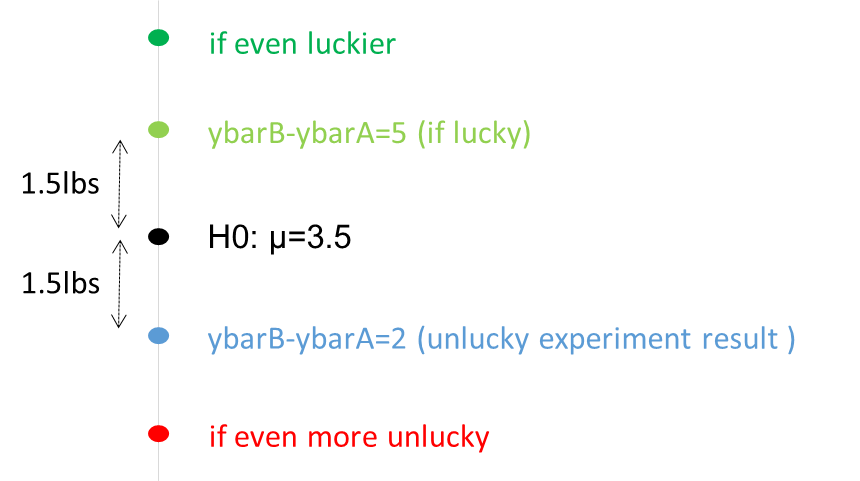 </div>

- H0: μB-μA=3.5 
- H1: μB-μA≠3.5

Cần tính xác suất P(ybarB-ybarA<=2 or ybarB-ybarA>=5)

In [51]:
t=((ybarB-ybarA)-3.5)/(sp*sqrt(1/nb+1/na))
print(t)

[1] -1.797127


- Giả sử H0 đúng thì P(ybarB-ybarA<=2 or ybarB-ybarA>=5) = P(t<-1.8) + P(t>1.8) = 2*P(t<1.8) = 0.09 -> không thể bác bỏ H0 (không thể bác bỏ tuyên bố của NSX)

### t-test sử dụng hàm R

In [17]:
t.test(data$value ~ data$type,var.equal = TRUE,mu=-3.5, alternative = "two.sided",paired = FALSE,conf.level = 0.95)


	Two Sample t-test

data:  data$value by data$type
t = 1.7971, df = 18, p-value = 0.08911
alternative hypothesis: true difference in means is not equal to -3.5
95 percent confidence interval:
 -3.7535674 -0.2464326
sample estimates:
mean in group A mean in group B 
             29              31 


## Câu 4
Giả sử chuyển từ A sang B chỉ có lời nếu năng suất trung bình B cao hơn ít nhất 0.6lbs. Chủ vườn là người rất thận trọng. Anh ta tuyên bố sẽ chuyển sang B chỉ khi khả năng lời từ 95% trở lên. Hỏi với dữ liệu hiện tại thì chủ vườn có chuyển hay không?

### Cách tính trực tiếp

Hiện tại kết quả thí nghiệm thu được chênh lệch B-A=2. Tuy nhiên khi lặp lại thí nghiệm kết quả có thể khác đi. Chủ vườn là người thận trọng, anh ta muốn khả năng lời từ 95% nghĩa là trong 100 lần lặp lại thí nghiệm thì có hơn 95% lần thu được kết quả lời (B-A>=0.6). Như vậy cần tính P(B-A≥0.6)

In [52]:
t_06lbs=(mean(B)-mean(A)-0.6)/(sp*sqrt(1/nb+1/na))
print(t_06lbs)

[1] 1.677318


Xác suất để thu được mức chênh lệch B-A≥0.6 khi lặp lại thí nghiệm là P(B-A≥0.6)=P(t≤1.68)

<div> 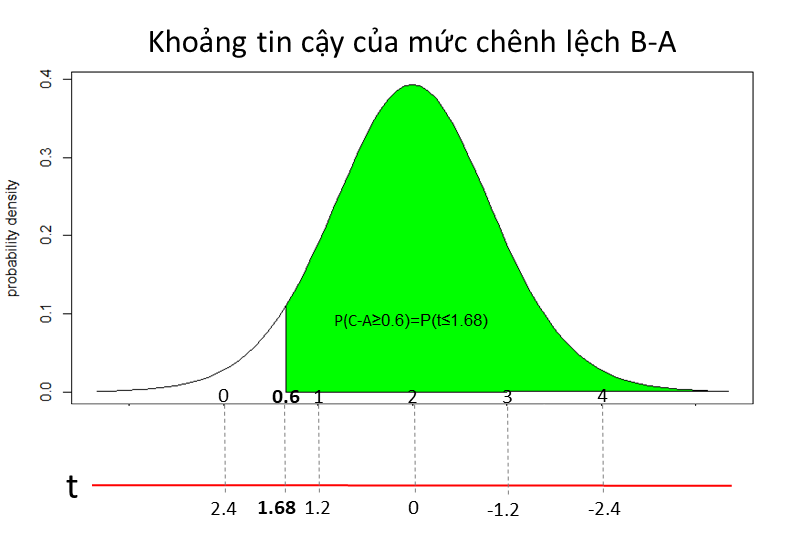 </div>

In [53]:
pt(t_06lbs,df=18,lower.tail=TRUE) 

[1] 0.9446203

Với dữ liệu hiện tại thì có 94.5% khả năng thu được kết quả ybarB-ybarA>0.6 nếu lặp lại thí nghiệm. Tức là khả năng lời là 94.5% nhỏ mức yêu cầu là 95% -> chủ vườn sẽ không chuyển

### Trực quan hóa

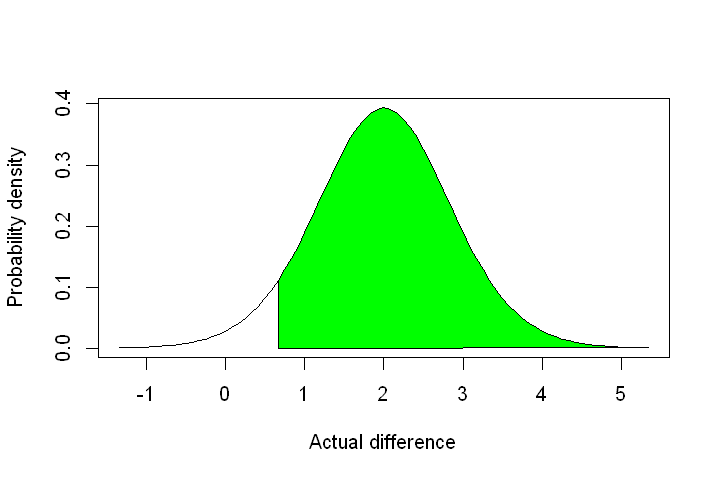

In [57]:
Tvalues = seq(-4,4,.1)
m = mean(B)-mean(A)+Tvalues*sp*sqrt(1/nb+1/na)
plot(m , y , type = "l" , xlab = "Actual difference" , ylab = "Probability density")
polygon(c(m[m>=0.6],min(m[m>=0.6])), c(y[m>=0.6],0), col="green")


### Tính gián tiếp
- Tính khoảng tin cậy 95% bên phải
- So sánh khoảng tin cậy 95% bên phải này với mức chênh lệch yêu cầu là 0.6

In [58]:
t05=abs(qt(0.05,18))
print(t05)

[1] 1.734064


In [59]:
lbound<-mean(B)-mean(A)-t05*sp*sqrt(1/nb+1/na) 
print(lbound)

[1] 0.5526368


- Yêu cầu: Chủ vườn muốn 95% khả năng thu được kết quả ybarB-ybarA>=0.6
- Thực tế: 95% khả năng thu được kết quả ybarB-ybarA>=0.55
- Suy ra khả năng thu được kết quả ybarB-ybarA>=0.6 phải nhỏ hơn 95%
- Kết luận không chuyển

### Trực quan hóa

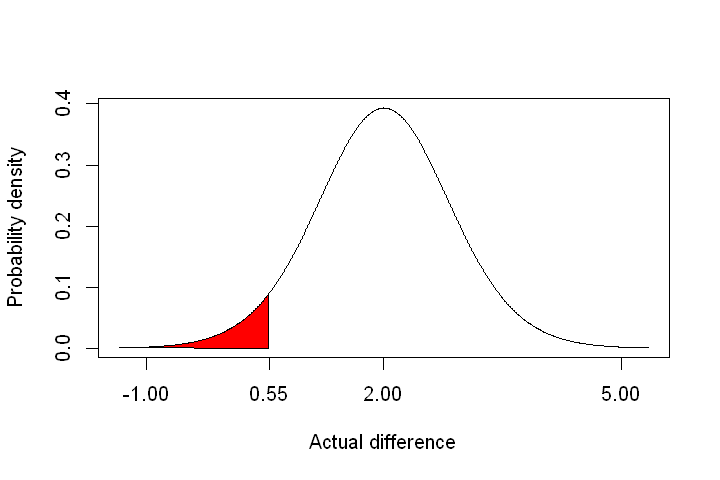

In [72]:
Tvalues = seq(-4,4,.01)
m = mean(B)-mean(A)+Tvalues*sp*sqrt(1/nb+1/na)
y = dt(Tvalues,18)
plot(m , y , type = "l" , xlab = "Actual difference" , ylab = "Probability density", axes = FALSE)
polygon(c(m[m<=lbound],max(m[m<=lbound])), c(y[m<=lbound],0), col="red")
axis(1,at=format(round(c(-1,lbound,2,5), 2), nsmall = 2))
axis(side = 2)
box()

## Câu 5
Một chủ vườn khác phân tích được kết quả rằng với vườn của anh ta thì việc chuyển sang B sẽ lỗ khi chênh lệch B-A ít hơn 1.2lbs. Với bản tính không ngại mạo hiểm, anh quyết định chuyển sang B. Hỏi với dữ liệu hiện tại thì xác suất lỗ của chủ vườn là bao nhiêu?

### Tính xác suất lỗ

Xác suất lỗ là tỷ lệ thu được kết quả chênh lệch B-A<1.2 nếu lặp lại thí nghiệm.

<div> 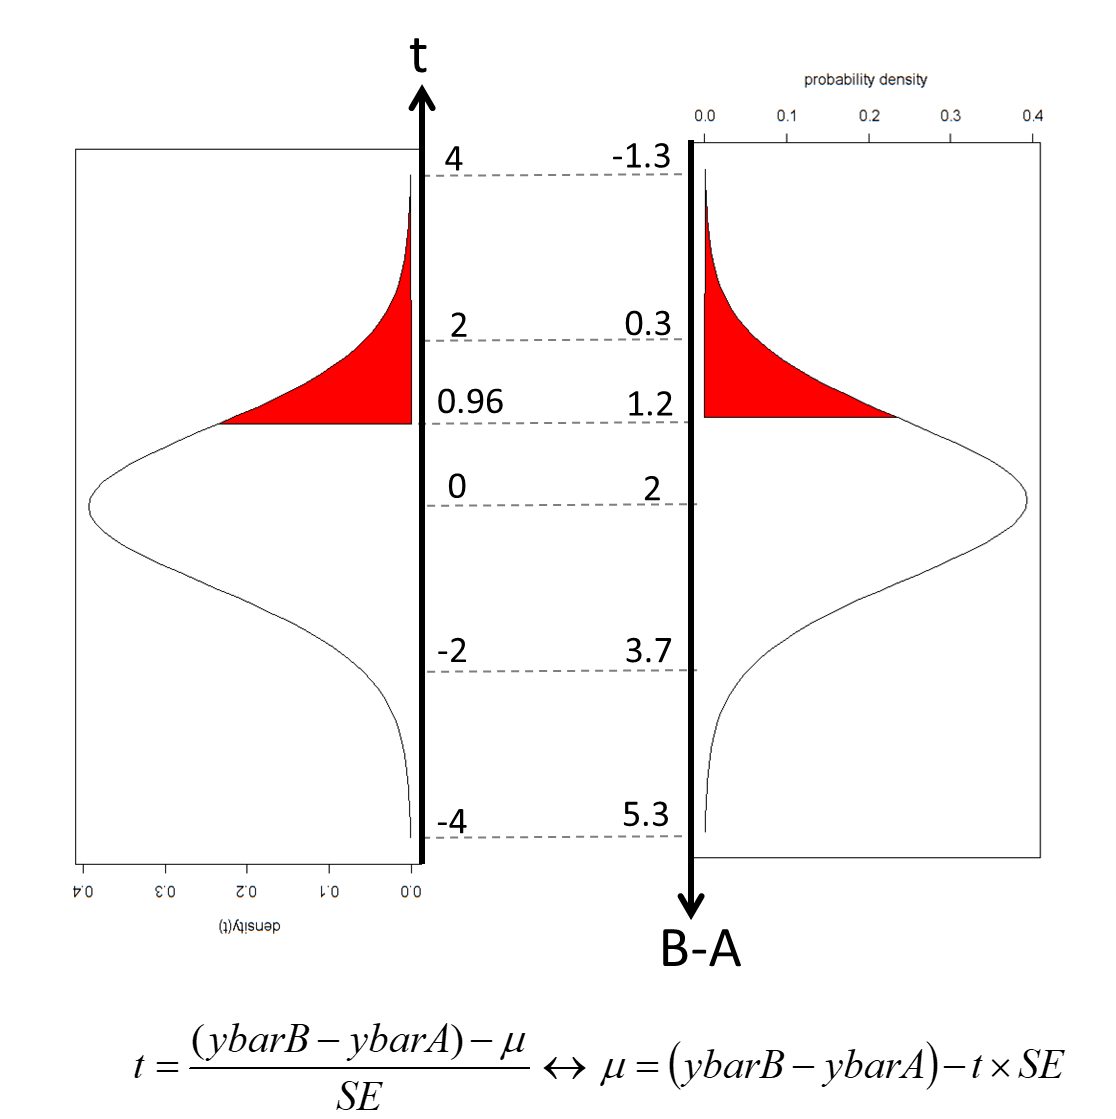</div>

In [73]:
t_12lbs=(mean(B)-mean(A)-1.2)/(sp*sqrt(1/nb+1/na))
print(t_12lbs)

[1] 0.9584677


In [74]:
pt(0.96,18,lower.tail = FALSE) 

[1] 0.1748871

Xác suất lỗ: P(B-A < 1.2) = P(t>0.96) = 17.5%